In [1]:
# 导入包
import pandas as pd
import matplotlib.pyplot as plt
# 引入要用到的评价函数
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
# 引入用到的分类算法
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings

In [2]:
warnings.filterwarnings('ignore')
# 读取数据
data_all = pd.read_csv('data.csv', encoding='gbk')
data_all.shape

(4754, 90)

In [3]:
delete = ['Unnamed: 0', 'custid', 'trade_no', 'bank_card_no', 'id_name', 'latest_query_time', 'source',
          'loans_latest_time', 'first_transaction_time']
data_all = data_all.drop(delete, axis=1)
data_all.shape

(4754, 81)

In [4]:
data_all = data_all.drop(['student_feature'], axis=1)

In [5]:
from sklearn.impute import SimpleImputer

for i in range(data_all.shape[1]):
    feature = data_all.iloc[:, i].values.reshape(-1, 1)  # sklearn中特征矩阵必须是二维
    imp_mode = SimpleImputer(strategy='most_frequent')
    data_all.iloc[:, i] = imp_mode.fit_transform(feature)

In [6]:
from sklearn.preprocessing import OrdinalEncoder

data_all['reg_preference_for_trad'] = OrdinalEncoder().fit_transform(
    data_all['reg_preference_for_trad'].values.reshape(-1, 1))

# 查找标签值对应的索引
for i in range(data_all.shape[1]):
    if data_all.columns[i] == 'status':
        print(i)


38


In [7]:
y = data_all.iloc[:, 38]
X = data_all.drop(['status'], axis=1)

# 划分数据集
X = data_all.drop(['status'], axis=1)
y = data_all['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2018)

In [8]:
# 归一化
sc = StandardScaler()
sc.fit(X_train)  # 估算每个特征的平均值和标准差
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
# 定义得分和RCO曲线
def get_scores(y_true, y_predicet, y_predict_pro):
    acc_score = accuracy_score(y_true, y_predicet)
    pre_score = precision_score(y_true, y_predicet)
    recall = recall_score(y_true, y_predicet)
    F1 = f1_score(y_true, y_predicet)
    auc_score = roc_auc_score(y_true, y_predict_pro)  # 直接求AUC值
    fpr, tpr, thresholds = roc_curve(y_test, y_predict_pro)  # 求ROC
    plt.plot(fpr, tpr, 'b', label='AUC = %0.4f' % auc_score)
    plt.plot([0, 1], [0, 1], 'r--', label='Random guess')
    plt.legend(loc='lower right')
    plt.title('ROCcurve')
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.show()

逻辑回归：


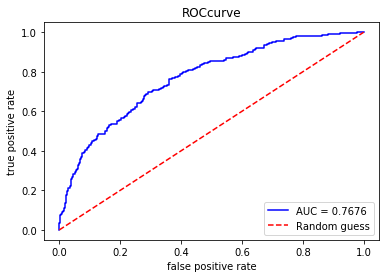

In [10]:
# 1逻辑回归
print('逻辑回归：')
lr = LogisticRegression(random_state=2018)
lr.fit(X_train_std, y_train)
# 得到预测标签值
lr_predict = lr.predict(X_test_std)
# 得到预测标签值的概率（标签为0的概率，标签为1的概率）
lr_predict_pro = lr.predict_proba(X_test_std)[:, 1]  # 预测标签为1的概率
get_scores(y_test, lr_predict, lr_predict_pro)

SVM：


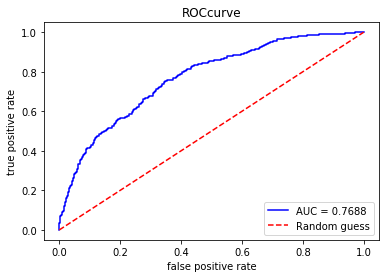

In [11]:
# 线性SVM
print('SVM：')
svc = LinearSVC(random_state=2018)
svc.fit(X_train_std, y_train)
svc_predict = svc.predict(X_test_std)
# 预测标签的概率值：在某些分类器上由“decision_function”返回
svc_predict_pro = svc.decision_function(X_test_std)
get_scores(y_test, svc_predict, svc_predict_pro)

tree:


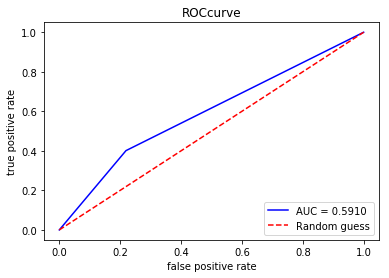

In [12]:
# 决策树
print('tree:')
clf = DecisionTreeClassifier(random_state=2018)
clf.fit(X_train_std, y_train)
clf_predict = clf.predict(X_test_std)
clf_predict_proba = clf.predict_proba(X_test_std)[:, 1]
get_scores(y_test, clf_predict, clf_predict_proba)

随机森林：


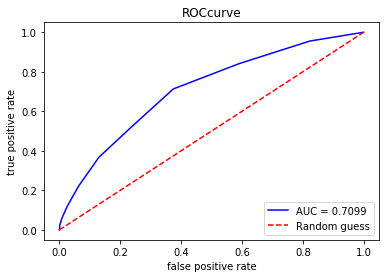

In [13]:
# 随机森林
print('随机森林：')
rfc = RandomForestClassifier(random_state=2018)
rfc.fit(X_train_std, y_train)
rfc_predict = rfc.predict(X_test_std)
rfc_predict_proba = rfc.predict_proba(X_test_std)[:, 1]
get_scores(y_test, rfc_predict, rfc_predict_proba)

GBDT：


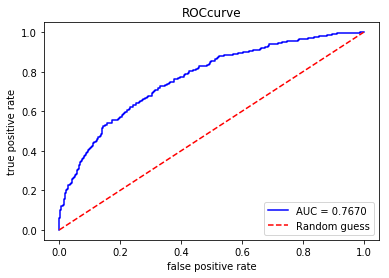

In [14]:
# GBDT
print('GBDT：')
gdbt = GradientBoostingClassifier(random_state=2018)
gdbt.fit(X_train_std, y_train)
gdbt_predict = gdbt.predict(X_test_std)
gdbt_predict_proba = gdbt.predict_proba(X_test_std)[:, 1]
get_scores(y_test, gdbt_predict, gdbt_predict_proba)

In [ ]:
# XGBoost
print('XGBoost:')
xgbs = XGBClassifier(random_state=2018)
xgbs.fit(X_train_std, y_train)
xgbs_predict = xgbs.predict(X_test_std)
xgbs_predict_proba = xgbs.predict_proba(X_test_std)[:, 1]
get_scores(y_test, xgbs_predict, xgbs_predict_proba)  #数据量太大  电脑带不动

XGBoost:


LightGBM：


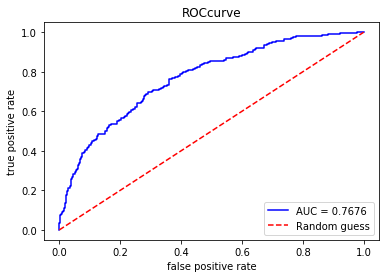

In [16]:
# LightGBM
print('LightGBM：')
lgbm = LGBMClassifier(random_state=2018)
lgbm.fit(X_train_std, y_train)
lgbm_predict = lgbm.predict(X_test_std)
lgbm_predict_proba = lgbm.predict_proba(X_test_std)[:, 1]
get_scores(y_test, lgbm_predict, lr_predict_pro)